# Programming with Python MOD007891 
## Assessment Element 010 ( Weighting = 100% )


# Section 1:  ( Analysis of Diabetic Patient Data ) - ( Weighting = 30% )

This dataset is originally from the **National Institute of Diabetes and Digestive and Kidney Diseases.** The dataset consist of several medical predictor **(independent)** variables and one target **(dependent)** variable, Outcome. 

Independent variables include:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skinfold thickness (mm).
- Two-Hour serum insulin (mu U/ml).
- Body mass index (weight in kg/(height in m)^2).
- Diabetes pedigree function.
- Age (years).
- Outcome: Class variable (0 or 1).


#### Upload the provided dataset (diabetes.csv) into your Jupyter Notebook working directory and then complete the following tasks.  

In [1]:
import pandas as pd

In [2]:
diabetes_df = pd.read_csv("Dataset/diabetes.csv")

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [6]:
# Let's look at the first few rows
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### 1. Identify the total number of records? 

In [7]:
diabetes_df.shape[0]

768

### 2. Display data types for all columns? 

In [8]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 3.  Check the dataset for the missing values? 

In [9]:
diabetes_df.isnull().values.any()

False

In [10]:
# Change column names to lower case
diabetes_df.columns =  diabetes_df.columns.str.lower()

In [12]:
diabetes_df.sample(5)

pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
596            0       67             76              0        0  45.3   
553            1       88             62             24       44  29.9   
508            2       84             50             23       76  30.4   
90             1       80             55              0        0  19.1   
347            3      116              0              0        0  23.5   

     diabetespedigreefunction  age  outcome  
596                     0.194   46        0  
553                     0.422   23        0  
508                     0.968   21        0  
90                      0.258   21        0  
347                     0.187   23        0

### 4. Display descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset such as total count, min, max, standard deviation, max and quartiles?

In [13]:
diabetes_df.describe()

pregnancies     glucose  bloodpressure  skinthickness     insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              bmi  diabetespedigreefunction         age     outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

As you probably have noticed, many columns have a **minimum value of 0** which is clearly not logical. Those are essentially **missing values** in our dataset. 



### 5. Identify columns with missing values and find out their frequency? 

In [15]:
diabetes_df.columns[(diabetes_df == 0).any()].tolist()

['pregnancies',
 'glucose',
 'bloodpressure',
 'skinthickness',
 'insulin',
 'bmi',
 'outcome']

In [108]:
# The 0 in the outcome column is not by error or missing value but rather a result of diabetes test

In [16]:
(diabetes_df == 0).sum()

pregnancies                 111
glucose                       5
bloodpressure                35
skinthickness               227
insulin                     374
bmi                          11
diabetespedigreefunction      0
age                           0
outcome                     500
dtype: int64

In [17]:
#Define function to replace 1 and 0 with Yes and No respectively
def replace_1_and_0(x):
    if x == 0:
        x = 'No'
    elif x == 1:
        x= 'Yes'
    return x

In [20]:
# Replace 1 and 0 in outcome column with 'Yes' and 'No respectively. Yes for positve and No for negative result'
diabetes_df['outcome'] = diabetes_df.outcome.map(lambda a:replace_1_and_0(a))

### 6. Identify the number of positive and negative patients based on target (dependent) variable, outcome? Plot the frequencies using a bar chart?

In [21]:
outcome_df = pd.DataFrame(diabetes_df.outcome.value_counts())

In [22]:
outcome_df

outcome
No       500
Yes      268

In [23]:
outcome_df.reset_index(inplace=True)
outcome_df.rename(columns={'index':'outcome','outcome':'frequency'},inplace=True)

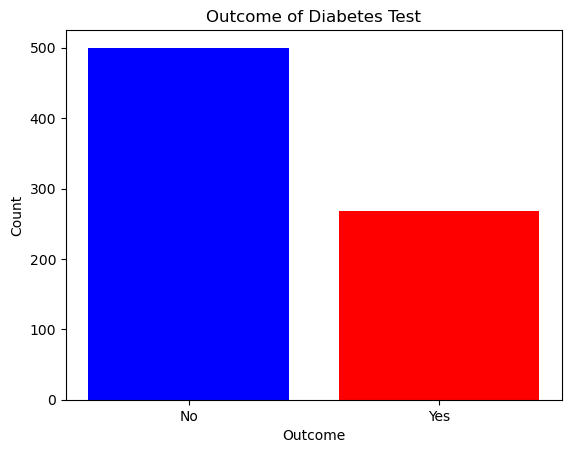

In [24]:
# sns.barplot(data=outcome_df,x='outcome',y='frequency')
plt.bar(data=outcome_df,x='outcome',height='frequency',color=['blue','red'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title(label='Outcome of Diabetes Test')
plt.show()

### 7. Display correlation among all dependent and independent variables using the correlation matrix? Illustrate correlation data using a heatmap plot?  

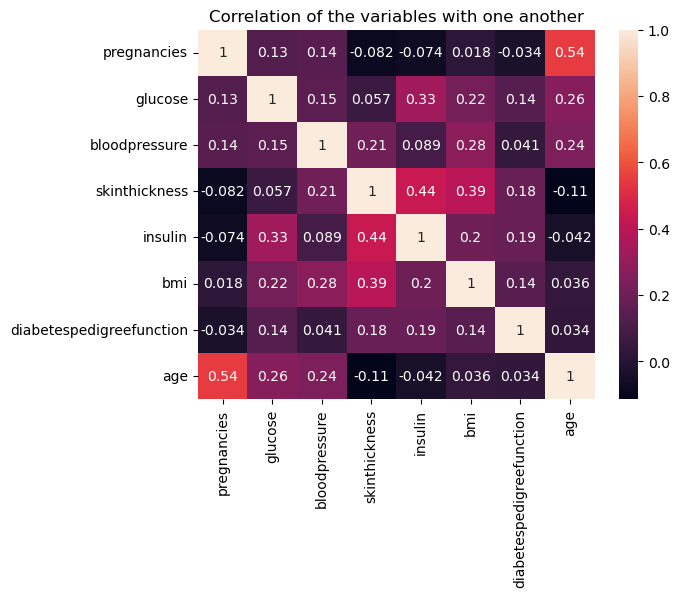

In [25]:
sns.heatmap(diabetes_df.corr(),annot=True)
plt.title('Correlation of the variables with one another')
plt.show()

We have observed earlier that missing values in this dataset are represented by 0. This is clearly not a good practice and negatively impacts our data analysis. 



### 8. Replace these zero values with NAN?

In [26]:
# A person could have zero preganacies, so pregnancies column is excluded
rep_col = ['glucose', 'bloodpressure', 'skinthickness', 'insulin','bmi', 'diabetespedigreefunction', 'age']
diabetes_df[rep_col] = diabetes_df[rep_col].replace({ 0:np.nan})

diabetes_df

pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     diabetespedigreefunction  age outcome  
0                       0.627   50     Yes  
1                       0.351   31      No  
2                       0.672   32     Yes  
3                       0.167   21      No  
4                       2.288   33     Yes  
..                        ...  ...     ...  
763                     0.171   63      No  
764                     0.340   27      No  
765                     0.245   30      No  
766                     0.349   47     Yes  
767                     0.315   23      No  

[768 rows x 9 columns]

### 9. Check out the variables for 0 value once again?  

In [27]:
(diabetes_df == 0).sum()


pregnancies                 111
glucose                       0
bloodpressure                 0
skinthickness                 0
insulin                       0
bmi                           0
diabetespedigreefunction      0
age                           0
outcome                       0
dtype: int64

### 10. Check out the missing values counts per variable?

In [28]:
(diabetes_df.isnull()).sum()

pregnancies                   0
glucose                       5
bloodpressure                35
skinthickness               227
insulin                     374
bmi                          11
diabetespedigreefunction      0
age                           0
outcome                       0
dtype: int64

### 11. Identify the mean value for each variable? 

In [29]:
diabetes_df.iloc[:,:-1].mean()

pregnancies                   3.845052
glucose                     121.686763
bloodpressure                72.405184
skinthickness                29.153420
insulin                     155.548223
bmi                          32.457464
diabetespedigreefunction      0.471876
age                          33.240885
dtype: float64

### 12. For the following columns, fill missing values with mean column values?  
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

In [30]:
cols = ['glucose','bloodpressure','skinthickness','insulin','bmi']
diabetes_df[cols] = diabetes_df[cols].fillna(diabetes_df[cols].mean())

(diabetes_df.isnull()).sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

### 13. Display descriptive statistics and checkout the min values of the aforementioned columns once again? Any ZEROS ? 

In [33]:
diabetes_df.describe()

pregnancies     glucose  bloodpressure  skinthickness     insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              bmi  diabetespedigreefunction         age  
count  768.000000                768.000000  768.000000  
mean    32.457464                  0.471876   33.240885  
std      6.875151                  0.331329   11.760232  
min     18.200000                  0.078000   21.000000  
25%     27.500000                  0.243750   24.000000  
50%     32.400000                  0.372500   29.000000  
75%     36.600000                  0.626250   41.000000  
max     67.100000                  2.420000   81.000000

#### Answer
**Zeros exist only in the pregnancies column, which is possible.**

### 14. Check out the missing values counts per variable, once again? 

In [34]:
(diabetes_df.isnull()).sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

### 15. Plot data distribution of each variable? Explain your thoughts 

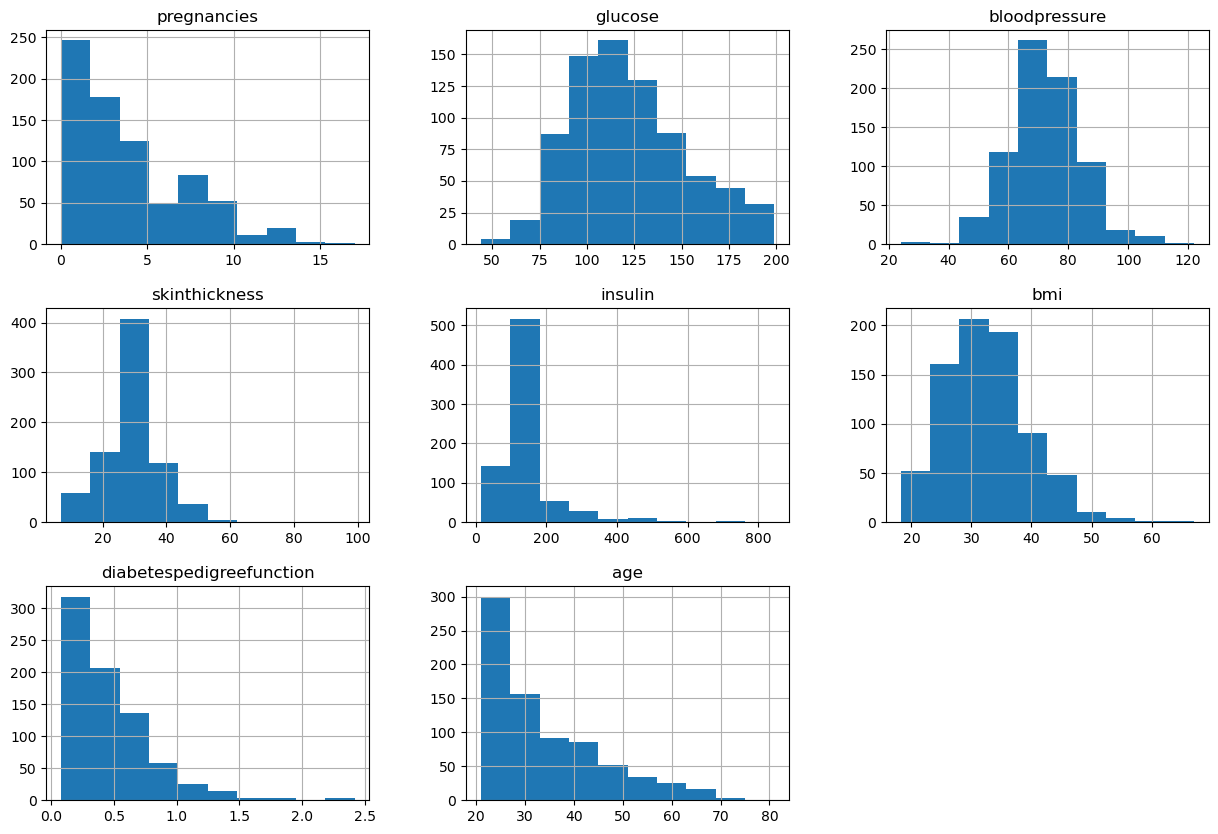

In [35]:
diabetes_df.hist(bins=10, figsize=(15, 10))
plt.show()

A Boxplot is a method for graphically depicting groups of numerical data through their quartiles. 

### 16. Plot the Boxplot for each variable? interpret the diagrams 

In [36]:
diabetes_df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

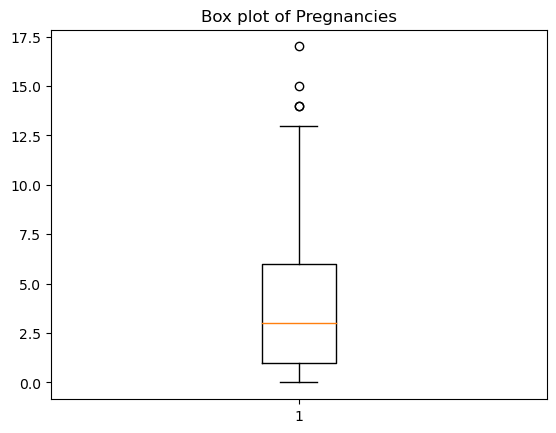

In [37]:
plt.boxplot(x=diabetes_df['pregnancies'])
plt.title(label='Box plot of Pregnancies');

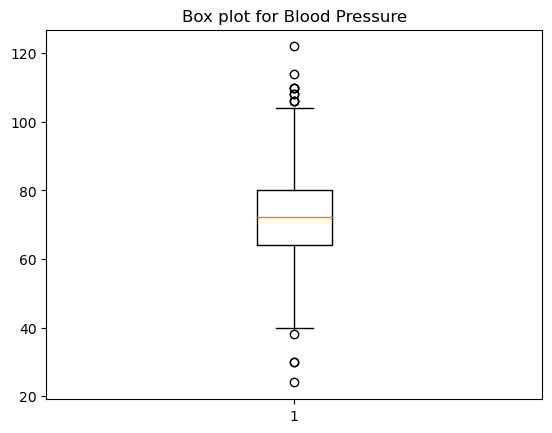

In [36]:
plt.boxplot(diabetes_df['bloodpressure'])
plt.title('Box plot for Blood Pressure');

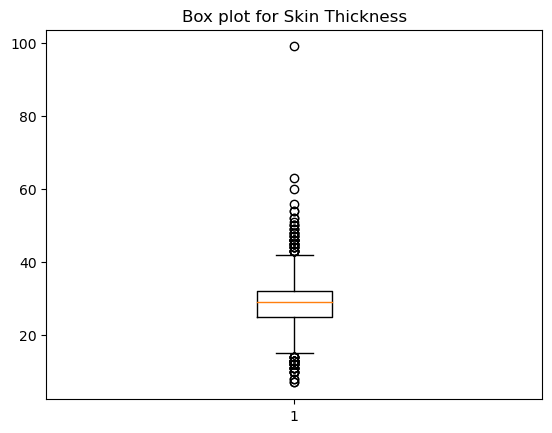

In [38]:
plt.boxplot(diabetes_df['skinthickness'])
plt.title('Box plot for Skin Thickness');

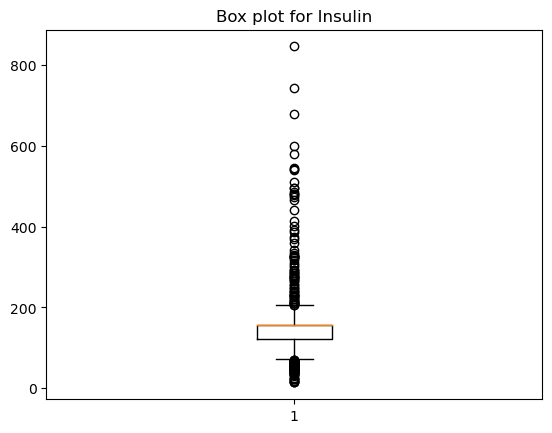

In [39]:
plt.boxplot(diabetes_df['insulin'])
plt.title('Box plot for Insulin');

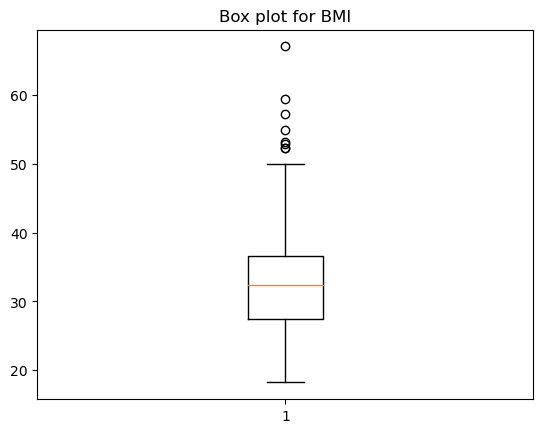

In [39]:
plt.boxplot(diabetes_df['bmi'])
plt.title('Box plot for BMI');

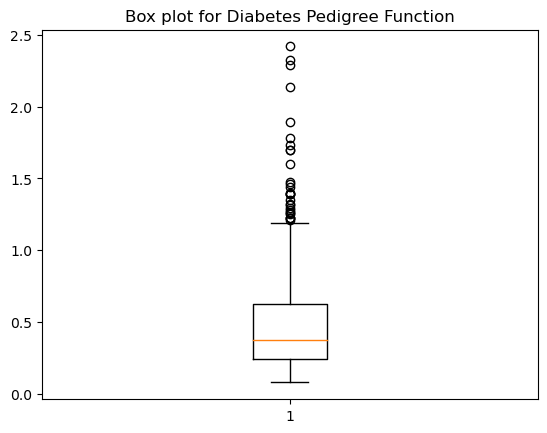

In [41]:
plt.boxplot(diabetes_df['diabetespedigreefunction'])
plt.title('Box plot for Diabetes Pedigree Function');

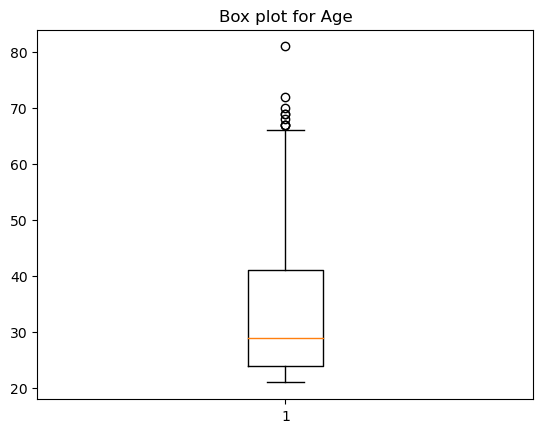

In [41]:
plt.boxplot(diabetes_df['age'])
plt.title('Box plot for Age');

In [37]:
# fig,ax = plt.subplots(4,2,figsize=(10,10))
# ax[0].plot(diabetes_df['pregnancies'])
# ax[1].plot(diabetes_df['glucose'])
# ax[2].plot(diabetes_df['bloodpressure'])
# ax[3].plot(diabetes_df['skinthickness'])


### 17. Plot demographic and distribution of diabetics/nondiabetics across age variable?

In [42]:
age_group = [20,29,39,49,59,69,79,89]
label = ['21-30','31-40','41-50','51-60','61-70','71-80','81-90']
diabetes_df['age_group'] = pd.cut(diabetes_df['age'],bins=age_group,labels=label)
diabetes_df

pregnancies  glucose  bloodpressure  skinthickness     insulin   bmi  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     diabetespedigreefunction  age outcome age_group  
0                       0.627   50     Yes     51-60  
1                       0.351   31      No     31-40  
2                       0.672   32     Yes     31-40  
3                       0.167   21      No     21-30  
4                       2.288   33     Yes     31-40  
..                        ...  ...     ...       ...  
763                     0.171   63      No     61-70  
764                     0.340   27      No     21-30  
765                     0.245   30      No     31-40  
766                     0.349   47     Yes     41-50  
767                     0.315   23      No     21-30  

[768 rows x 10 columns]

In [43]:
diabetic = diabetes_df[diabetes_df['outcome'] == 'Yes']

diabetic = diabetic.sort_values(by='age_group')

non_diabetic = diabetes_df[diabetes_df['outcome'] == 'No']

non_diabetic = non_diabetic.sort_values(by='age_group')

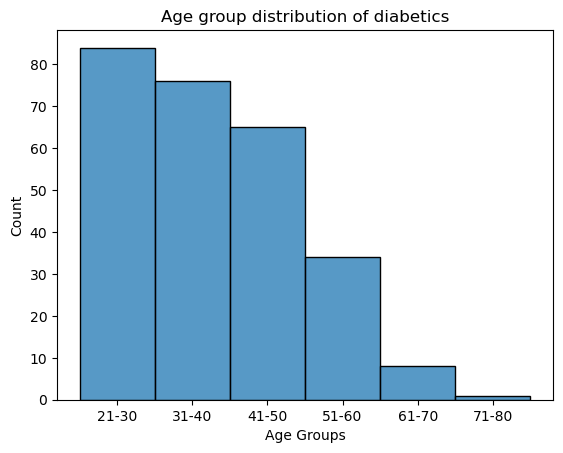

In [44]:
sns.histplot(data=diabetic,x = 'age_group')
plt.xlabel('Age Groups')
plt.title(label='Age group distribution of diabetics');

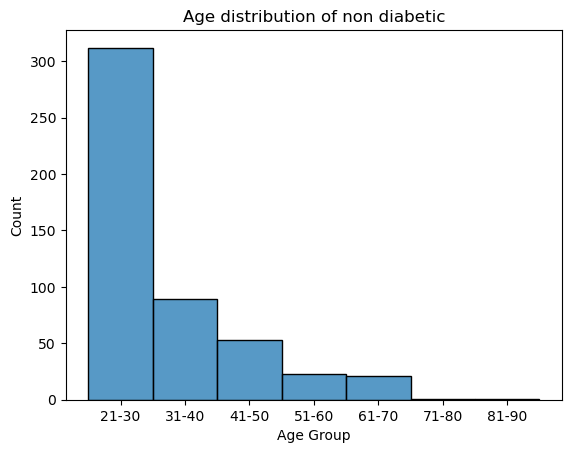

In [45]:
sns.histplot(data=non_diabetic,x='age_group')
plt.xlabel('Age Group')
plt.title(label='Age distribution of non diabetic');

### 18. Investigate how the number of pregnancies impacts diabetes? Demonstrate the relationship with a plot. 

Text(0.5, 1.0, 'Relationship between Pregnancies and Diabetes Result')

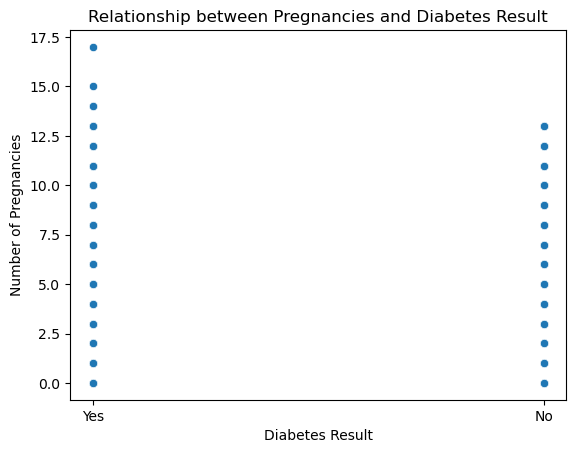

In [46]:
sns.scatterplot(data=diabetes_df,x='outcome',y='pregnancies');
plt.ylabel('Number of Pregnancies')
plt.xlabel('Diabetes Result')
plt.title(label='Relationship between Pregnancies and Diabetes Result')

**From the scatterplot above, the number of pregnancies does no affect whether a person is diabetic or not.**

### 19. Check if there are any outliers in our dataset. Any data point outside 25% and 75% quarters can be considered an outlier. Remove the outliers from our dataset. 

In [60]:
diabetes_df.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome', 'age_group'],
      dtype='object')

In [57]:
col_outlier = ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin','bmi', 'diabetespedigreefunction', 'age']
Q1 = diabetes_df.quantile(0.25)
Q3 = diabetes_df.quantile(0.75)
outliers_df=diabetes_df[(diabetes_df[col_outlier] < Q1)|(diabetes_df[col_outlier] > Q3)]

In [58]:
outliers_df

pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0            NaN    148.0            NaN           35.0      NaN   NaN   
1            NaN     85.0            NaN            NaN      NaN  26.6   
2            8.0    183.0            NaN            NaN      NaN  23.3   
3            NaN     89.0            NaN           23.0     94.0   NaN   
4            0.0      NaN           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0      NaN            NaN           48.0    180.0   NaN   
764          NaN      NaN            NaN            NaN      NaN  36.8   
765          NaN      NaN            NaN           23.0    112.0  26.2   
766          NaN      NaN           60.0            NaN      NaN   NaN   
767          NaN     93.0            NaN            NaN      NaN   NaN   

     diabetespedigreefunction   age outcome age_group  
0                       0.627  50.0     NaN       NaN  
1                         NaN   NaN     NaN       NaN  
2                       0.672   NaN     NaN       NaN  
3                       0.167  21.0     NaN       NaN  
4                       2.288   NaN     NaN       NaN  
..                        ...   ...     ...       ...  
763                     0.171  63.0     NaN       NaN  
764                       NaN   NaN     NaN       NaN  
765                       NaN   NaN     NaN       NaN  
766                       NaN  47.0     NaN       NaN  
767                       NaN  23.0     NaN       NaN  

[768 rows x 10 columns]

In [73]:
diabetes_df[col_outlier].clip(lower = Q1,upper= Q3,axis=1)

C:\Users\cruda\AppData\Local\Temp\ipykernel_12764\324753182.py:1: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  diabetes_df[col_outlier].clip(lower = Q1,upper= Q3,axis=1)


pregnancies  glucose  bloodpressure  skinthickness     insulin   bmi  \
0              6   140.25           72.0       32.00000  155.548223  33.6   
1              1    99.75           66.0       29.00000  155.548223  27.5   
2              6   140.25           64.0       29.15342  155.548223  27.5   
3              1    99.75           66.0       25.00000  121.500000  28.1   
4              1   137.00           64.0       32.00000  155.548223  36.6   
..           ...      ...            ...            ...         ...   ...   
763            6   101.00           76.0       32.00000  155.548223  32.9   
764            2   122.00           70.0       27.00000  155.548223  36.6   
765            5   121.00           72.0       25.00000  121.500000  27.5   
766            1   126.00           64.0       29.15342  155.548223  30.1   
767            1    99.75           70.0       31.00000  155.548223  30.4   

     diabetespedigreefunction  age  
0                     0.62625   41  
1                     0.35100   31  
2                     0.62625   32  
3                     0.24375   24  
4                     0.62625   33  
..                        ...  ...  
763                   0.24375   41  
764                   0.34000   27  
765                   0.24500   30  
766                   0.34900   41  
767                   0.31500   24  

[768 rows x 8 columns]

### 20. Create a new categorical variable based on BMI using the following criteria. Name the new variable “BMI_tier” and add it to our dataset as a new column. 

- BMI = 0  then “NA”
- 0 < BMI < 18.5 then “Under Weight”
- 18.5 <= BMI < 25 then “Normal”
- 25 <= BMI < 30 then “Overweight” 
- 30 <= BMI then “Obese”


In [48]:
# 
bmi_bin = [0,18.5,25,30,70]
bmi_label = ['Under Weight','Normal','Overweight','Obese']
diabetes_df['bmi_tier'] = pd.cut(diabetes_df['bmi'],bins=bmi_bin,labels=bmi_label)

In [49]:
diabetes_df

pregnancies  glucose  bloodpressure  skinthickness     insulin   bmi  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     diabetespedigreefunction  age outcome age_group    bmi_tier  
0                       0.627   50     Yes     51-60       Obese  
1                       0.351   31      No     31-40  Overweight  
2                       0.672   32     Yes     31-40      Normal  
3                       0.167   21      No     21-30  Overweight  
4                       2.288   33     Yes     31-40       Obese  
..                        ...  ...     ...       ...         ...  
763                     0.171   63      No     61-70       Obese  
764                     0.340   27      No     21-30       Obese  
765                     0.245   30      No     31-40  Overweight  
766                     0.349   47     Yes     41-50       Obese  
767                     0.315   23      No     21-30       Obese  

[768 rows x 11 columns]

### 21. Plot the BMI_tier histogram ?  

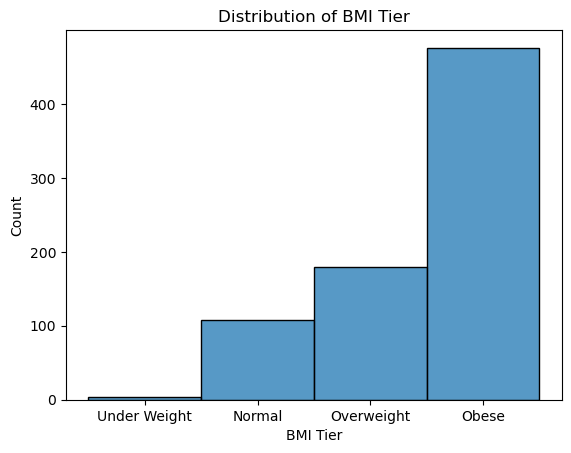

In [50]:
sns.histplot(data=diabetes_df,x='bmi_tier')
plt.title(label='Distribution of BMI Tier')
plt.xlabel('BMI Tier');

### 22. How many obese individuals exist in our dataset?  Use  Piechart to illustrate the proportion of each BMI tier? 

In [51]:
diabetes_df.query("bmi_tier == 'Obese'" )['bmi_tier'].count()

476

In [53]:
bmi_pie =  diabetes_df.groupby('bmi_tier')[['bmi_tier']].count()
# bmi_pie.rename(columns={'bmi_tier':'frequency'},inplace=True)

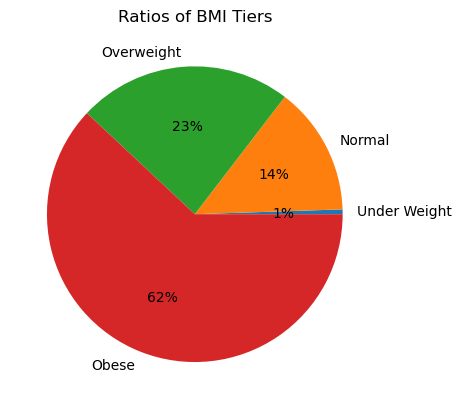

In [54]:
plt.pie(data= bmi_pie,x ='bmi_tier',labels=bmi_pie.index,autopct='%.0f%%')
plt.title(label='Ratios of BMI Tiers');

### 23. Create a new categorical variable based on Oral Glucose Tolerance Test (Glucose) using the following criteria, suggested by DIABETES UK. Name the new variable “OGTT_tier” and add it to our dataset as a new column. 

- Glucose == 0 then “NA”
- Glucose < 140 then “Normal”
- 140 <= Glucose < 198 then “Impaired Glucose Tolerance”
- 198 <= Glucose then “Diabetic Level”


In [55]:
glucose_bin = [0,140,197,200]
glucose_label = ['Normal','Impaired Glucose Tolerance','Diabetic Level']
diabetes_df['ogtt_tier'] = pd.cut(diabetes_df['glucose'],bins=glucose_bin, labels=glucose_label)

In [56]:
diabetes_df

pregnancies  glucose  bloodpressure  skinthickness     insulin   bmi  \
0              6    148.0           72.0       35.00000  155.548223  33.6   
1              1     85.0           66.0       29.00000  155.548223  26.6   
2              8    183.0           64.0       29.15342  155.548223  23.3   
3              1     89.0           66.0       23.00000   94.000000  28.1   
4              0    137.0           40.0       35.00000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0       48.00000  180.000000  32.9   
764            2    122.0           70.0       27.00000  155.548223  36.8   
765            5    121.0           72.0       23.00000  112.000000  26.2   
766            1    126.0           60.0       29.15342  155.548223  30.1   
767            1     93.0           70.0       31.00000  155.548223  30.4   

     diabetespedigreefunction  age outcome age_group    bmi_tier  \
0                       0.627   50     Yes     51-60       Obese   
1                       0.351   31      No     31-40  Overweight   
2                       0.672   32     Yes     31-40      Normal   
3                       0.167   21      No     21-30  Overweight   
4                       2.288   33     Yes     31-40       Obese   
..                        ...  ...     ...       ...         ...   
763                     0.171   63      No     61-70       Obese   
764                     0.340   27      No     21-30       Obese   
765                     0.245   30      No     31-40  Overweight   
766                     0.349   47     Yes     41-50       Obese   
767                     0.315   23      No     21-30       Obese   

                      ogtt_tier  
0    Impaired Glucose Tolerance  
1                        Normal  
2    Impaired Glucose Tolerance  
3                        Normal  
4                        Normal  
..                          ...  
763                      Normal  
764                      Normal  
765                      Normal  
766                      Normal  
767                      Normal  

[768 rows x 12 columns]

### 24.How many individuals are categorized as “Diabetic Level” in our newly created variable, “OGTT_tier”?  Plot the “OGTT_tier” histogram?   

In [59]:
(diabetes_df.query('ogtt_tier == "Diabetic Level"')).shape[0]

2

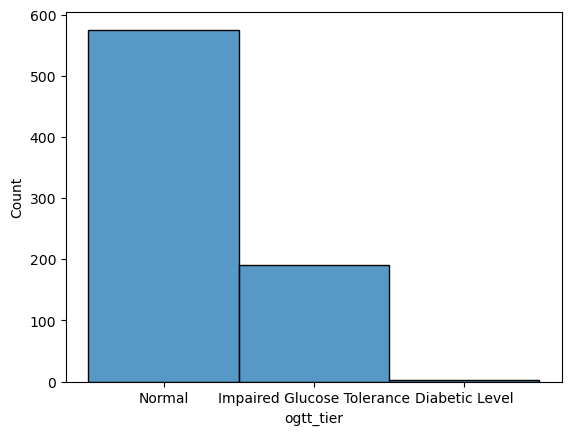

In [61]:
sns.histplot(data=diabetes_df,x='ogtt_tier');

### 25. Out of those who categorized as “Impaired Glucose Tolerance”, how many of them are actually diabetes? What about those with “Normal” OGTT_tier?  

# Section 2:  ( 2021  Tokyo Olympics ) - ( Weighting = 30% )

In this task we work with 2021 Tokyo summer Olympics dataset. This contains the details of over 11,000 athletes, with 47 disciplines, along with 743 Teams taking part in the 2021(2020) Tokyo Olympics. This dataset contains the details of the Athletes, Coaches, Teams participating as well as the Entries by gender. It contains their names, countries represented, discipline, gender of competitors, name of the coaches.

In [62]:
athlete_data = pd.read_excel("Dataset/Athletes.xlsx")
coach_data = pd.read_excel("Dataset/Coaches.xlsx")
gender_data = pd.read_excel("Dataset/EntriesGender.xlsx")
medal_data = pd.read_excel("Dataset/Medals.xlsx")
team_data = pd.read_excel("Dataset/Teams.xlsx")

C:\Users\Saheed\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
# Let's look at the first few rows for each table

In [63]:
athlete_data.head()

Name     NOC           Discipline
0    AALERUD Katrine  Norway         Cycling Road
1        ABAD Nestor   Spain  Artistic Gymnastics
2  ABAGNALE Giovanni   Italy               Rowing
3     ABALDE Alberto   Spain           Basketball
4      ABALDE Tamara   Spain           Basketball

In [64]:
athlete_data.rename(columns={'Name':'name','NOC':'country','Discipline':'discipline'},inplace=True)

In [65]:
coach_data.head()

Name            NOC  Discipline Event
0  ABDELMAGID Wael          Egypt    Football   NaN
1        ABE Junya          Japan  Volleyball   NaN
2    ABE Katsuhiko          Japan  Basketball   NaN
3     ADAMA Cherif  Côte d'Ivoire    Football   NaN
4       AGEBA Yuya          Japan  Volleyball   NaN

In [66]:
gender_data.head()

Discipline  Female  Male  Total
0       3x3 Basketball      32    32     64
1              Archery      64    64    128
2  Artistic Gymnastics      98    98    196
3    Artistic Swimming     105     0    105
4            Athletics     969  1072   2041

In [67]:
medal_data.head()

Rank                    Team/NOC  Gold  Silver  Bronze  Total  \
0     1    United States of America    39      41      33    113   
1     2  People's Republic of China    38      32      18     88   
2     3                       Japan    27      14      17     58   
3     4               Great Britain    22      21      22     65   
4     5                         ROC    20      28      23     71   

   Rank by Total  
0              1  
1              2  
2              5  
3              4  
4              3

In [68]:
team_data.head()

Name      Discipline                         NOC  Event
0  Belgium  3x3 Basketball                     Belgium    Men
1    China  3x3 Basketball  People's Republic of China    Men
2    China  3x3 Basketball  People's Republic of China  Women
3   France  3x3 Basketball                      France  Women
4    Italy  3x3 Basketball                       Italy  Women

In [70]:
team_data.query('Event == "Women"')

Name      Discipline                         NOC  Event
2            China  3x3 Basketball  People's Republic of China  Women
3           France  3x3 Basketball                      France  Women
4            Italy  3x3 Basketball                       Italy  Women
6            Japan  3x3 Basketball                       Japan  Women
8         Mongolia  3x3 Basketball                    Mongolia  Women
..             ...             ...                         ...    ...
734    Netherlands      Water Polo                 Netherlands  Women
735            ROC      Water Polo                         ROC  Women
738   South Africa      Water Polo                South Africa  Women
740          Spain      Water Polo                       Spain  Women
742  United States      Water Polo    United States of America  Women

[114 rows x 4 columns]

In [72]:
athlete_data.columns = athlete_data.columns.str.lower()
gender_data.columns = gender_data.columns.str.lower()
team_data.columns = team_data.columns.str.lower()
coach_data.columns = coach_data.columns.str.lower()
medal_data.columns = medal_data.columns.str.lower()

### 1. Which countries do most athletes come from? Plot a descendingly ordered bar plot to show athletes counts based on their country of origin? 

In [73]:
athletes_per_country = athlete_data.groupby('country').count()


athletes_per_country.reset_index(inplace=True)

athletes_per_country.drop(columns='discipline',inplace=True)

athletes_per_country.rename(columns={'name':'number_of_athletes'},inplace=True)

athletes_per_country.sort_values(ascending=False,inplace=True,by='number_of_athletes')

athletes_per_country

country  number_of_athletes
195       United States of America                 615
94                           Japan                 586
10                       Australia                 470
144     People's Republic of China                 401
71                         Germany                 400
..                             ...                 ...
173                    South Sudan                   2
36        Central African Republic                   2
157          Saint Kitts and Nevis                   2
176  St Vincent and the Grenadines                   2
118                     Mauritania                   2

[206 rows x 2 columns]

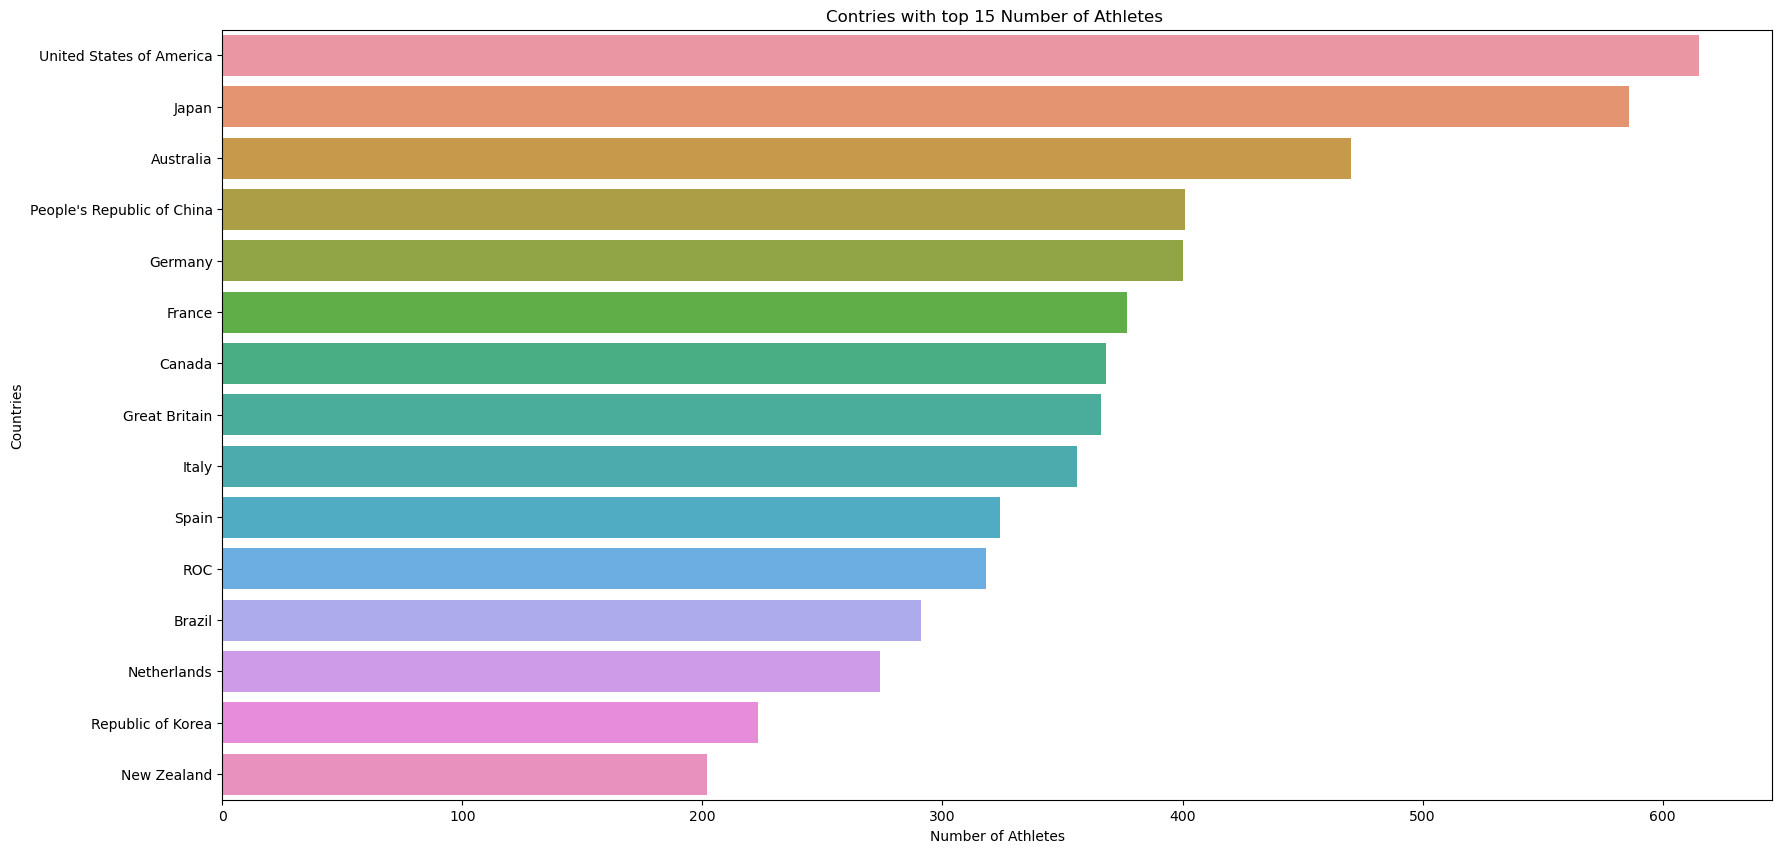

In [74]:
plt.figure(figsize=(20,10))
sns.barplot(x='number_of_athletes',y='country',data=athletes_per_country.iloc[0:15,:])
plt.xlabel('Number of Athletes')
plt.ylabel('Countries')
plt.title('Contries with top 15 Number of Athletes ');

### 2. Which country has the most female athletes? Plot a descendingly ordered bar plot to show female athletes counts based on their country of origin?

In [75]:
t = team_data.query('discipline == "Table Tennis"')

In [76]:
t = t[t.event.str.contains('Women')]

In [77]:
t.groupby('noc').sum()

name    discipline         event
noc                                                                      
Australia                           Australia  Table Tennis  Women's Team
Austria                               Austria  Table Tennis  Women's Team
Brazil                                 Brazil  Table Tennis  Women's Team
Chinese Taipei                 Chinese Taipei  Table Tennis  Women's Team
Egypt                                   Egypt  Table Tennis  Women's Team
France                                 France  Table Tennis  Women's Team
Germany                               Germany  Table Tennis  Women's Team
Hong Kong, China             Hong Kong, China  Table Tennis  Women's Team
Hungary                               Hungary  Table Tennis  Women's Team
Japan                                   Japan  Table Tennis  Women's Team
People's Republic of China              China  Table Tennis  Women's Team
Poland                                 Poland  Table Tennis  Women's Team
Republic of Korea           Republic of Korea  Table Tennis  Women's Team
Romania                               Romania  Table Tennis  Women's Team
Singapore                           Singapore  Table Tennis  Women's Team
United States of America        United States  Table Tennis  Women's Team

### 3. Which country has the least female athletes?

### 4. Which sport is most popular (based on athletes counts)  and which country has the highest participants in it? Plot a descendingly ordered bar plot to show athlete counts in different sports? 

In [78]:
gender_data.head()

discipline  female  male  total
0       3x3 Basketball      32    32     64
1              Archery      64    64    128
2  Artistic Gymnastics      98    98    196
3    Artistic Swimming     105     0    105
4            Athletics     969  1072   2041

In [79]:
popular_sport = gender_data.total.max()

most_popular_sport = gender_data.query('total == @popular_sport').loc[:,['discipline']]

most_popular_sport

discipline
4  Athletics

In [83]:
gender_data_sorted = gender_data.sort_values(by='total',ascending=False)

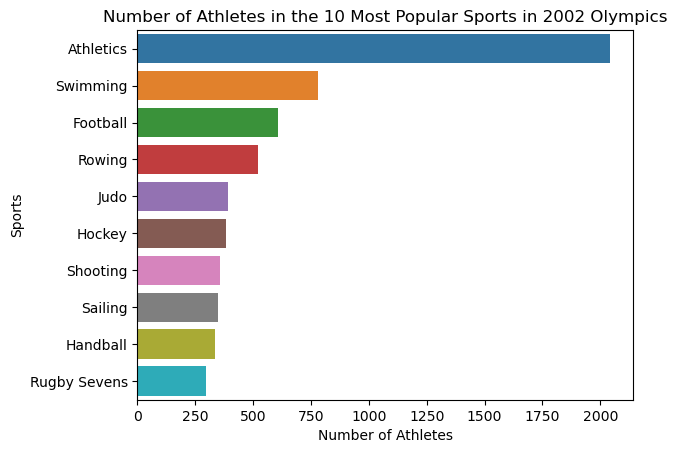

In [88]:
sns.barplot(data=gender_data_sorted.head(10),y='discipline',x='total')
plt.xlabel('Number of Athletes')
plt.ylabel('Sports')
plt.title('Number of Athletes in the 10 Most Popular Sports in 2002 Olympics');
# plt.xticks(rotation=90)

### 5. Plot a descendingly ordered categorical bar plot to show gender segregated athlete counts in different sports.

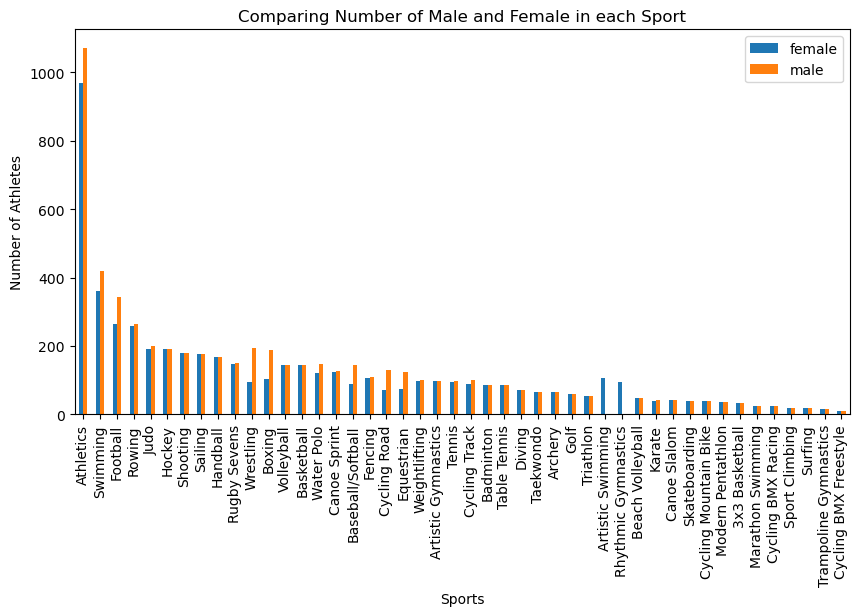

In [90]:
# sns.barplot(x = 'discipline',y='total',hue=['female','male'], data = gender_data)
gender_data_sorted = gender_data.sort_values(by='total',ascending=False)
gender_data_sorted.plot(y=['female','male'],x='discipline',kind ='bar',figsize=(10,5))
plt.ylabel('Number of Athletes')
plt.xlabel('Sports')
plt.title(label='Comparing Number of Male and Female in each Sport');


### 6. Which sport has they highest proportion of male to female athletes? Plot a descendingly ordered bar plot to depict male to female athletes proportion across different sports.

In [91]:
gender_data['gender_proportion'] =  gender_data['male']/gender_data['female']

a = gender_data.gender_proportion.max()

# Sport with highest proportion of male to female
gender_data.query('gender_proportion == @a')[['discipline']]

discipline
45  Wrestling

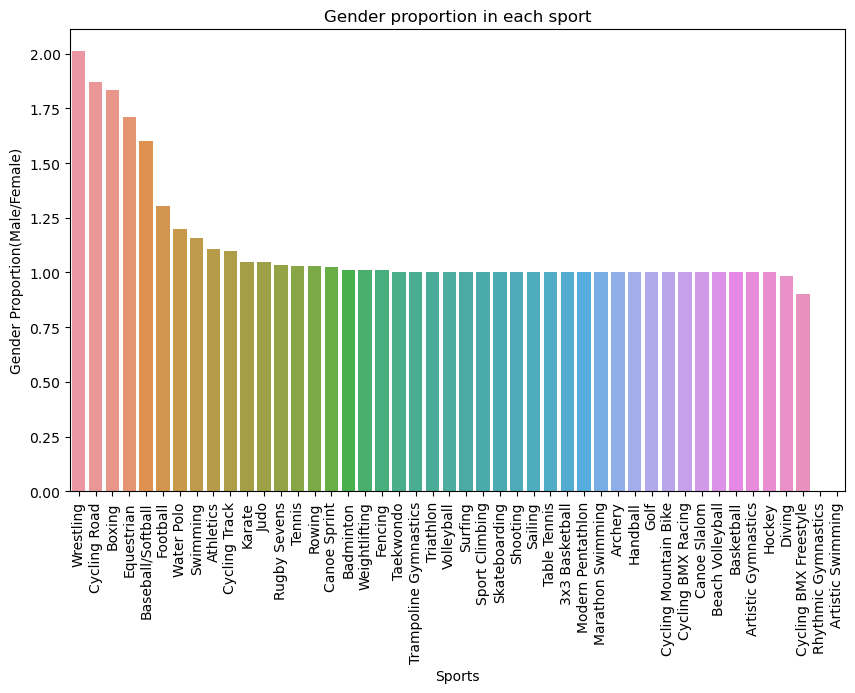

In [92]:
plt.figure(figsize=(10,6))
sns.barplot(data=gender_data.sort_values(by='gender_proportion',ascending=False),x = 'discipline', y='gender_proportion')
plt.title(label='Gender proportion in each sport')
plt.xlabel('Sports')
plt.xticks(rotation=90)
plt.ylabel('Gender Proportion(Male/Female)');


### 7. Which country recieved most gold medals? Which recieved most silver and most bronze? Which received least for each? Use bar plot to for illustration.  

In [106]:
# Country with th highest gold medal
max_gold = medal_data.gold.max()
medal_data.query('gold == @max_gold')[['rank','country','gold']]

rank                   country  gold
0     1  United States of America    39

In [108]:
#Countries with the least gold medal, not considering countries without medals
min_gold = medal_data.query('gold > 0').gold.min()
medal_data.query('gold == @min_gold')[['rank','country','gold']]

rank           country  gold
52    53           Austria     1
44    45           Belarus     1
62    63           Bermuda     1
53    54             Egypt     1
58    59           Estonia     1
55    56          Ethiopia     1
59    59              Fiji     1
48    49  Hong Kong, China     1
47    48             India     1
54    55         Indonesia     1
60    59            Latvia     1
63    63           Morocco     1
49    50       Philippines     1
56    56          Portugal     1
64    63       Puerto Rico     1
45    46           Romania     1
50    50          Slovakia     1
51    52      South Africa     1
61    59          Thailand     1
57    58           Tunisia     1
43    44           Ukraine     1
46    46         Venezuela     1

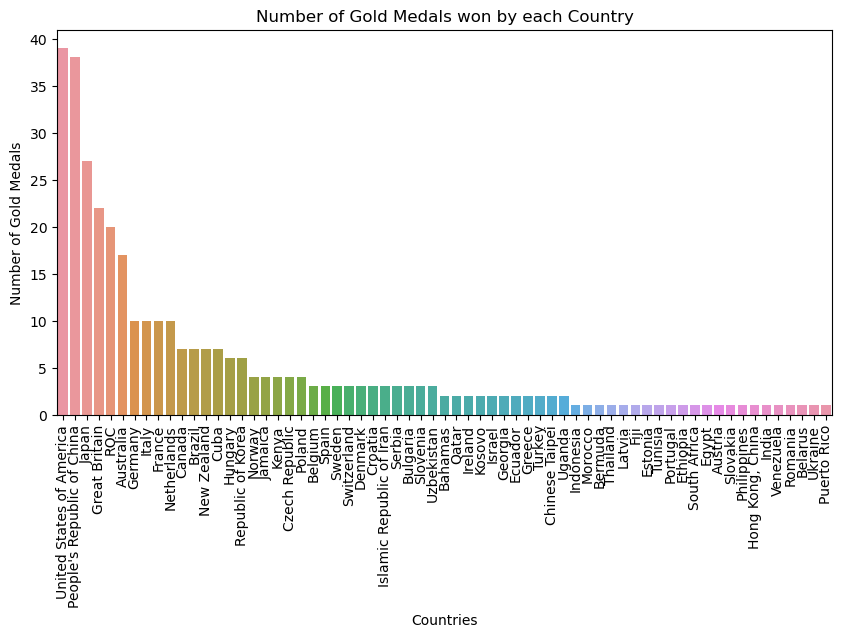

In [94]:
# Countries having zero gold medals are excluded to enhance clarity
plt.figure(figsize=(10,5))
sns.barplot(data=medal_data[medal_data['gold'] > 0].sort_values(by='gold', ascending=False),x='team/noc',y='gold')
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Number of Gold Medals')
plt.title(label='Number of Gold Medals won by each Country');

In [110]:
#Countries with the least amount of gold medal
max_silver = medal_data.silver.max()
medal_data.query('silver == @max_silver')[['rank','country','silver']]

rank                   country  silver
0     1  United States of America      41

In [95]:
#Countries with the least amount of silver medal
min_silver = medal_data.query('silver > 0').silver.min()
medal_data.query('silver == @min_silver')[['rank','team/noc','silver']]

rank         team/noc  silver
20    21          Jamaica       1
27    28           Serbia       1
28    29          Belgium       1
29    30         Bulgaria       1
30    31         Slovenia       1
35    36           Greece       1
36    36           Uganda       1
37    38          Ecuador       1
52    53          Austria       1
53    54            Egypt       1
54    55        Indonesia       1
55    56         Ethiopia       1
56    56         Portugal       1
57    58          Tunisia       1
70    71         Mongolia       1
71    72        Argentina       1
72    72       San Marino       1
73    74           Jordan       1
74    74         Malaysia       1
75    74          Nigeria       1
76    77          Bahrain       1
77    77     Saudi Arabia       1
78    77        Lithuania       1
79    77  North Macedonia       1
80    77          Namibia       1
81    77     Turkmenistan       1

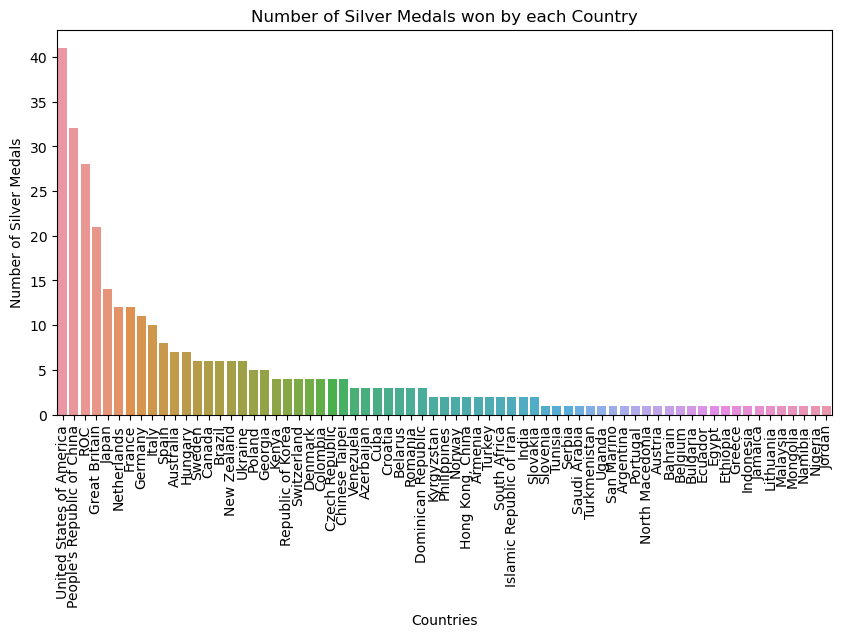

In [112]:
# Countries having zero silver medals are excluded to enhance clarity
plt.figure(figsize=(10,5))
sns.barplot(data=medal_data[medal_data['silver'] > 0].sort_values(by='silver', ascending=False),x='country',y='silver')
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Number of Silver Medals')
plt.title(label='Number of Silver Medals won by each Country');

In [113]:
# Country that won highest bronze
max_bronze = medal_data.bronze.max()
medal_data.query('bronze == @max_bronze')[['rank','country','bronze']]

rank                   country  bronze
0     1  United States of America      33

In [114]:
# Countries that won the least amount of bronze
min_bronze = medal_data.query('bronze > 0').bronze.min()
medal_data.query('bronze == @min_bronze')[['rank','country','bronze']]

rank               country  bronze
85    86              Botswana       1
86    86          Burkina Faso       1
65    66              Colombia       1
87    86         Côte d'Ivoire       1
58    59               Estonia       1
59    59                  Fiji       1
32    33               Georgia       1
88    86                 Ghana       1
35    36                Greece       1
89    86               Grenada       1
73    74                Jordan       1
90    86                Kuwait       1
69    70            Kyrgyzstan       1
60    59                Latvia       1
74    74              Malaysia       1
75    74               Nigeria       1
49    50           Philippines       1
40    41                 Qatar       1
91    86   Republic of Moldova       1
50    50              Slovakia       1
30    31              Slovenia       1
92    86  Syrian Arab Republic       1
61    59              Thailand       1
36    36                Uganda       1

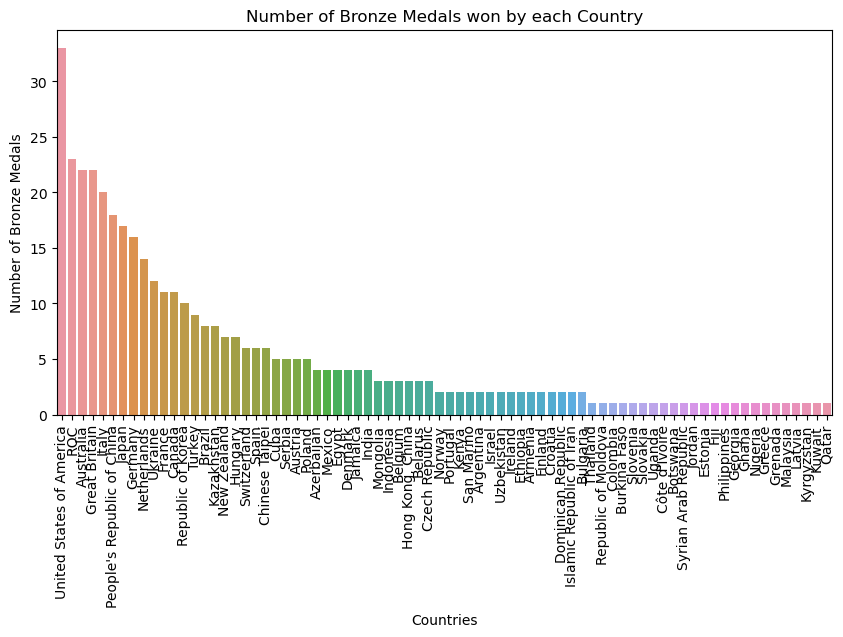

In [116]:
# Countries having zero bronze medals are excluded to enhance clarity
plt.figure(figsize=(10,5))
sns.barplot(data=medal_data[medal_data['bronze'] > 0].sort_values(by='bronze', ascending=False),x='country',y='bronze')
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Number of Bronze Medals')
plt.title(label='Number of Bronze Medals won by each Country');

### 8. Which country has the highest number of medals (Gold – Silver- Bronze) per capita (participants)? 

In [117]:
athletes_per_country.sort_values(by='country',inplace=True)
medal_data.rename(columns={'team/noc':'country','Rank by Total':'rank_by_total'},inplace=True)
medal_data.sort_values(by='country',inplace=True)


In [128]:
merged = pd.merge(left=medal_data,right=athletes_per_country,left_on='country',right_on='country',suffixes=('x_','y_'))

In [129]:
merged['medal_per_capita'] = merged['total']/merged['number_of_athletes']

In [130]:
merged['medal_per_capita'] = merged.medal_per_capita.round(2)

In [131]:
#get the maximum medal per capita
max_capita = merged.medal_per_capita.max()

In [132]:
#Query the country with the maximum medal per capita
merged.query('medal_per_capita == @max_capita')

rank     country  gold  silver  bronze  total  rank by total  \
74    72  San Marino     0       1       2      3             60   

    number_of_athletes  medal_per_capita  
74                   4              0.75

### 9. List countries with no medals? 

In [133]:
countries_without_medal = list(set(athletes_per_country['country'].to_list()) - set(medal_data['country'].to_list()))
countries_without_medal = pd.DataFrame({'Countries Without Medal':countries_without_medal})
countries_without_medal.sort_values('Countries Without Medal')

Countries Without Medal
83               Afghanistan
17                   Albania
91                   Algeria
110           American Samoa
16                   Andorra
..                       ...
49   Virgin Islands, British
58        Virgin Islands, US
27                     Yemen
66                    Zambia
95                  Zimbabwe

[113 rows x 1 columns]

### 10. Which country had the greatest number of coaches. Plot a descendingly ordered bar plot to show coach counts in different countries. 

In [134]:
coach_country_count = (coach_data.groupby('noc').count()).loc[:,['name']]
coach_country_count.reset_index(inplace=True)
coach_country_count.rename(columns={'noc':'country','name':'count'},inplace=True)
coach_country_count.sort_values(by='count',ascending=False,inplace=True)


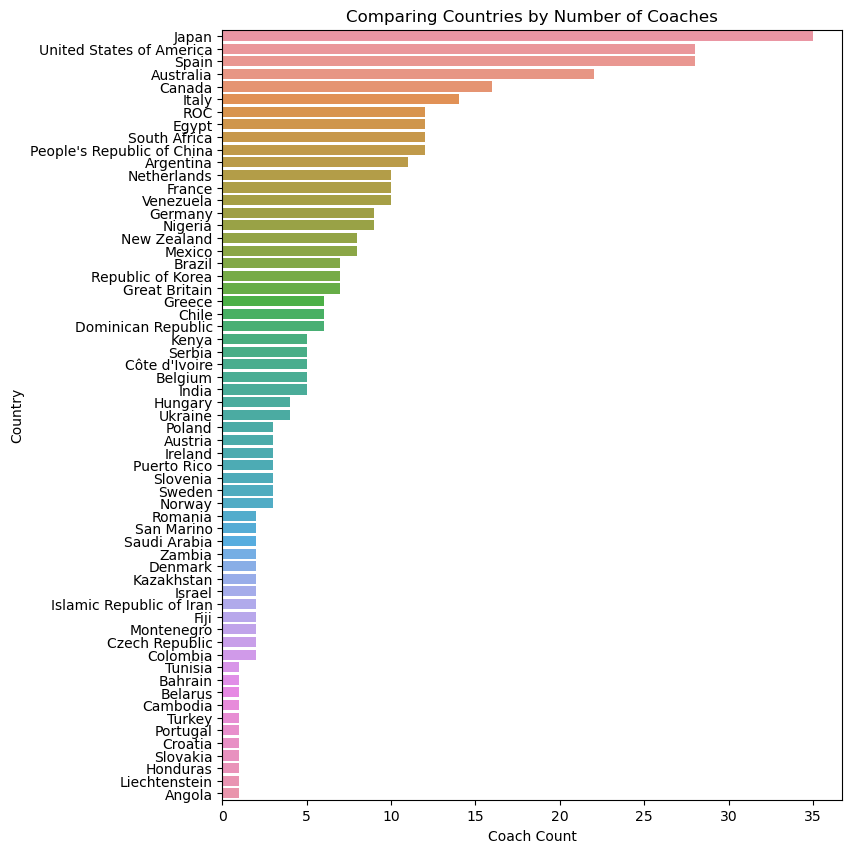

In [135]:
plt.figure(figsize=(8,10))
# plt.barh(data=coach_country_count,y='country',width='count')
sns.barplot(data=coach_country_count,x='count',y ='country')
plt.xlabel('Coach Count')
plt.ylabel('Country')
plt.title(label='Comparing Countries by Number of Coaches');

### 11. Plot a descendingly ordered bar plot to show coach counts across different sports.  

In [136]:
sport_coach = coach_data.groupby(['discipline']).count()[['name']]
sport_coach.reset_index(inplace=True)
sport_coach.rename(columns={'name':'count'},inplace=True)
sport_coach.sort_values(by='count',inplace=True,ascending=False)
sport_coach

discipline  count
2         Basketball     74
0  Artistic Swimming     69
3           Football     59
5             Hockey     45
7         Volleyball     45
4           Handball     29
1  Baseball/Softball     26
6       Rugby Sevens     25
8         Water Polo     22

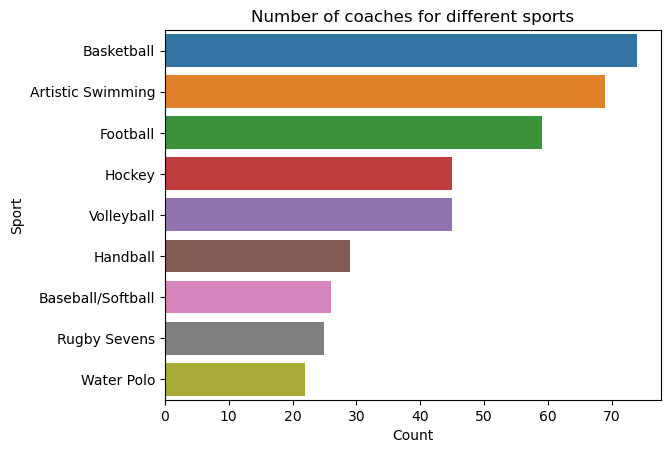

In [137]:
sns.barplot(data=sport_coach,x='count',y='discipline')
plt.xlabel('Count')
plt.ylabel('Sport')
plt.title(label='Number of coaches for different sports');


### 12. Identify the most popular coach, female and male athlete first name? 

In [142]:
athletes_names = pd.DataFrame(athlete_data.name)
coach_names = pd.DataFrame(coach_data.name)
names = pd.concat([athletes_names,coach_names],axis=0)

In [157]:
# From observation and a little googling, I observed that the first names are written last and last names are written first
names['first_name'] = names.name.map(lambda a:a.split(' ')[-1:][0])

In [161]:
# Count the frequency of first names
names.first_name.value_counts()

Anna          57
Maria         51
David         48
Daniel        45
Laura         42
              ..
Lynna          1
Kamola         1
Richardson     1
Olimjon        1
Nkuliso        1
Name: first_name, Length: 5901, dtype: int64

**From the above, the most popular first name is Anna**

# Section 4:  ( Show Analysis ) - ( Weighting = 20% )

based on the provided show dataset, please answer the following questions: 

### 1. Import the dataset in to your workspace as a data frame

In [163]:
show_df = pd.read_csv('dataset/show.csv')

In [164]:
show_df.sample(3)

show_id     type                         title        director  \
1126   s1152    Movie  Octonauts & the Ring of Fire   Blair Simmons   
7237   s2487  TV Show             Mystic Pop-up Bar       Not Given   
4512   s6257    Movie                   Be Here Now  Lilibet Foster   

            country date_added  release_year rating  duration  \
1126          China  3/30/2021          2021   TV-Y    73 min   
7237    South Korea  5/21/2020          2020  TV-MA  1 Season   
4512  United States  2/28/2017          2015  TV-MA   110 min   

                                              listed_in  
1126                           Children & Family Movies  
7237  International TV Shows, Korean TV Shows, TV Co...  
4512                                      Documentaries

### 2. Removed all duplicates and perform normal cleaning procedure if needed.

In [165]:
# To show duplicated row
show_df[show_df.duplicated(keep=False)]

Empty DataFrame
Columns: [show_id, type, title, director, country, date_added, release_year, rating, duration, listed_in]
Index: []

In [166]:
show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [167]:
show_df.isnull().values.any()

False

In [168]:
show_df.columns[(show_df == '').any()].tolist()

[]

### 3. Changing datatype of date_added column to datetime so you can conduct time based analysis

In [169]:
show_df['date_added'] = pd.to_datetime(show_df['date_added'])

### 4. Create 3 separate columns for week-day, month, and year based on the date_added column and name them month_added,	year_added, and	day_added respectively. 

In [170]:
# create day_added column
show_df['day_added'] = show_df.date_added.dt.day_name()

In [171]:
# create year_added column
show_df['year_added'] = show_df.date_added.dt.year

In [172]:
# create month added column
show_df['month_added'] = show_df.date_added.dt.month_name()

In [173]:
show_df.sample(5)

show_id     type                      title  \
7291   s2685  TV Show        The Innocence Files   
219     s159    Movie    Love Don't Cost a Thing   
2320   s2920    Movie    Dragon Quest Your Story   
1714   s2034  TV Show  La Línea: Shadow of Narco   
6742    s754  TV Show     Newly Rich, Newly Poor   

                                             director        country  \
7291                                        Not Given  United States   
219                                         Troy Byer  United States   
2320  Takashi Yamazaki, Ryuichi Yagi, Makoto Hanafusa          Japan   
1714                                        Pepe Mora          Spain   
6742                                        Not Given       Colombia   

     date_added  release_year rating  duration  \
7291 2020-04-15          2020  TV-MA  1 Season   
219  2021-09-01          2003  PG-13   101 min   
2320 2020-02-13          2019  TV-PG   103 min   
1714 2020-09-09          2020  TV-MA  1 Season   
6742 2021-06-06          2007  TV-MA  1 Season   

                                              listed_in  day_added  \
7291                         Crime TV Shows, Docuseries  Wednesday   
219                           Comedies, Romantic Movies  Wednesday   
2320  Action & Adventure, Anime Features, Children &...   Thursday   
1714  Crime TV Shows, Docuseries, International TV S...  Wednesday   
6742  International TV Shows, Romantic TV Shows, Spa...     Sunday   

      year_added month_added  
7291        2020       April  
219         2021   September  
2320        2020    February  
1714        2020   September  
6742        2021        June

### 5. Group shows by their type and display the frequency of each type. Also, use a piechart to display show type percentage.

In [143]:
a = show_df.groupby('type')[['director']].count()
# a.reset_index(inplace=True)
a.rename({'director':'frequency'},axis=1,inplace=True)

In [144]:
a

frequency
type              
Movie         6126
TV Show       2664

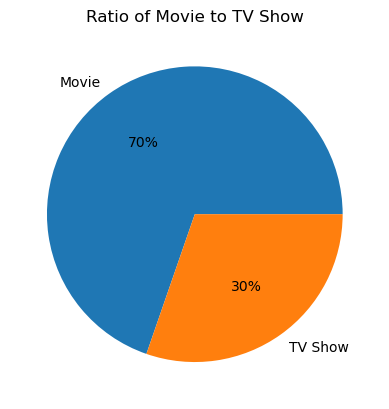

In [145]:
plt.pie(data=a,x='frequency',labels=a.index,autopct='%.0f%%');
plt.title(label='Ratio of Movie to TV Show');

### 6. Display the number of shows that each director has ever directed along with the show type. 

In [174]:
show_type_director = show_df.groupby(['director','type']).count()
show_type_director = show_type_director.loc[:,['show_id']]
show_type_director = show_type_director.sort_values(by='show_id').query('director != "Not Given"')
show_type_director = show_type_director.unstack(fill_value=0)
show_type_director = show_type_director.droplevel(level=0,axis=1)               
show_type_director['total'] = show_type_director['Movie'] + show_type_director['TV Show']
show_type_director

type                              Movie  TV Show  total
director                                               
Kieran Darcy-Smith                    1        0      1
Luke Sparke                           1        0      1
Susan Glatzer                         1        0      1
Lydia Dean Pilcher, Ginny Mohler      1        0      1
Lydia Tenaglia                        1        0      1
...                                 ...      ...    ...
Martin Scorsese                      12        0     12
Cathy Garcia-Molina                  13        0     13
Jay Karas                            14        0     14
Suhas Kadav                          16        0     16
Raúl Campos, Jan Suter               18        0     18

[4527 rows x 3 columns]

### 7. Display the top 10 most active directors. 

In [147]:
show_type_director.sort_values(by='total',ascending=False).head(10)

type                    Movie  TV Show  total
director                                     
Rajiv Chilaka              19        1     20
Raúl Campos, Jan Suter     18        0     18
Alastair Fothergill         4       14     18
Suhas Kadav                16        0     16
Marcus Raboy               15        1     16
Jay Karas                  14        0     14
Cathy Garcia-Molina        13        0     13
Martin Scorsese            12        0     12
Youssef Chahine            12        0     12
Jay Chapman                12        0     12

### 8. Group shows based on country and type. Display their frequency too. 

In [175]:
type_and_country = (show_df.groupby(['country','type']).count()[['show_id']])
# type_and_country = type_and_country.reset_index()
type_and_country = type_and_country.unstack(fill_value=0)
type_and_country = type_and_country.droplevel(level=0,axis=1)
type_and_country= type_and_country.astype({'Movie':'int64','TV Show':'int64'},)
type_and_country = type_and_country.reset_index()

In [176]:
type_and_country = type_and_country.query('country != "Not Given"')

In [177]:
type_and_country

type       country  Movie  TV Show
0        Argentina     56       20
1        Australia     61       53
2          Austria      8        1
3       Bangladesh      3        0
4          Belarus      0        1
..             ...    ...      ...
81         Uruguay      8        1
82       Venezuela      2        0
83         Vietnam      7        0
84    West Germany      1        0
85        Zimbabwe      1        0

[85 rows x 3 columns]

### 9. Identify countries with the highest number of show production (top 10). Display their show production frequency too. Beside table, use bar plot to articulate your findings.

In [178]:
type_and_country['total'] = type_and_country['Movie'] + type_and_country['TV Show']
type_and_country= type_and_country.sort_values(by='total',ascending=False).head(10)

In [152]:
type_and_country

type         country  Movie  TV Show  total
80     United States   2395      845   3240
29             India    976       81   1057
79    United Kingdom    387      251    638
52          Pakistan     71      350    421
10            Canada    187       84    271
36             Japan     87      172    259
68       South Korea     49      165    214
20            France    148       65    213
70             Spain    129       53    182
44            Mexico     90       48    138

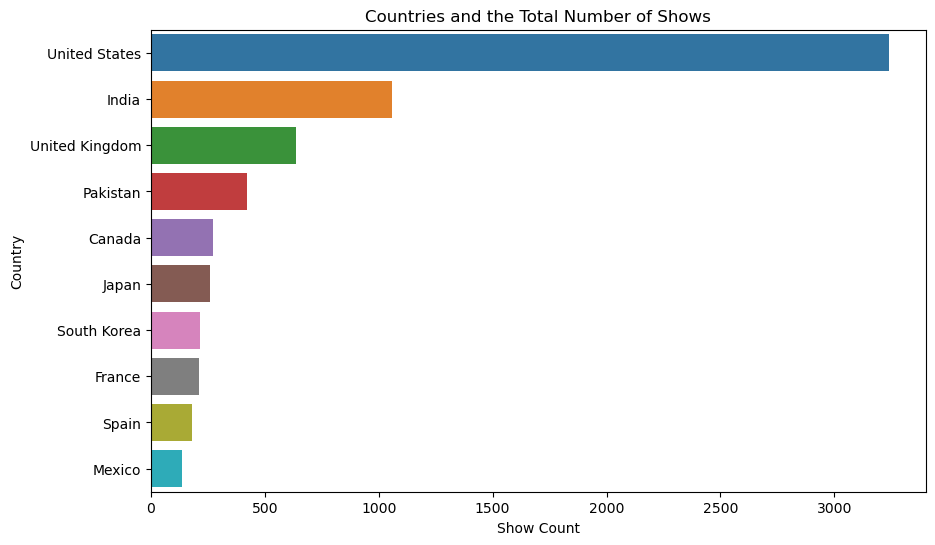

In [179]:
plt.figure(figsize=(10,6))
sns.barplot(data=type_and_country,x='total',y='country')
# plt.xticks(rotation = 90)
plt.ylabel('Country')
plt.xlabel('Show Count')
plt.title(label='Countries and the Total Number of Shows');

### 10. Group shows based on the listed_in (genre) feature. Display their frequency too.

In [180]:
show_genre = show_df.groupby(['listed_in']).count()[['show_id']]
# show_genre = show_genre.reset_index()

show_genre.rename( columns={'show_id':'count'},inplace=True)

In [181]:
show_genre

count
listed_in                                                
Action & Adventure                                    128
Action & Adventure, Anime Features                      1
Action & Adventure, Anime Features, Children & ...      4
Action & Adventure, Anime Features, Classic Movies      2
Action & Adventure, Anime Features, Horror Movies       1
...                                                   ...
TV Horror, TV Mysteries, Teen TV Shows                  1
TV Horror, Teen TV Shows                                2
TV Sci-Fi & Fantasy, TV Thrillers                       1
TV Shows                                               16
Thrillers                                              65

[513 rows x 1 columns]

### 11. Identify the top 10 most popular genre based on the listed_in feature.

In [182]:
show_genre.sort_values(by='count',ascending=False).head(10)

count
listed_in                                              
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180

### 12. Use line plot to display show frequency per year segregated by show type. 

In [183]:
type_and_year = show_df.groupby(['year_added','type']).count()[['show_id']]
type_and_year = type_and_year.unstack(fill_value=0).droplevel(level=0,axis=1)
type_and_year.reset_index(inplace=True)

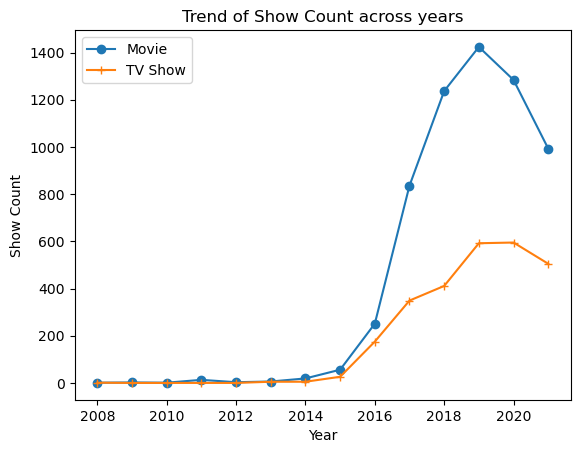

In [173]:
plt.plot('year_added','Movie',data=type_and_year, marker='o')
plt.plot('year_added','TV Show',data=type_and_year,marker='+')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Show Count')
plt.title('Trend of Show Count across years');

# Section 3:  ( Chessboard ) - ( Weighting = 10% )

A chessboard is an eight-by-eight grid of squares. A queen is a chess piece that can
move on the chessboard any number of squares along any row, column, or diagonal.
A queen is attacking another piece if in a single move, it can move to the square the
piece is on without jumping over any other piece. (In other words, if the other piece is
in the line of sight of the queen, then it is attacked by it.) The eight queens problem
poses the question of how eight queens can be placed on a chessboard without any
queen attacking another queen.

![queens](queen.png)

To represent squares on the chessboard, we will assign each an integer row and an
integer column. We can ensure each of the eight queens is not on the same column
by simply assigning them sequentially the columns 1 through 8. The variables in our
constraint-satisfaction problem can just be the column of the queen in question. The
domains can be the possible rows (again, 1 through 8).

### Write a piece of code that prints out all the possible arrangements of eight queens on the chessboard. 
**Important:** Your code must be fully commented. 


In [355]:
chess = [[0]*8 for i in range(8)]

In [368]:
def obstruct(i, j):
    for k in range(8):
        if chess[i][k]==1 or chess[k][j]==1:
            return True

    for k in range(8):
        for l in range(8):
            if (k+l==i+j) or (k-l==i-j):
                if chess[k][l]==1:
                    return True
    return False

def arrange(n):
    if n==0:
        return True
    for i in range(8):
        for j in range(8):
            if (not(obstruct(i,j))) and (chess[i][j]!=1):
                chess[i][j] = 1
                if arrange(n-1)==True:
                    return True
                chess[i][j] = 0

    return False

arrange(8)
for i in chess:
    print (i)

[1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]


# Section 4:  ( Encryption ) - ( Weighting = 10% )

Encryption is the method by which information is converted into secret code that hides the information's true meaning. The science of encrypting and decrypting information is called cryptography.

In computing, unencrypted data is also known as plaintext, and encrypted data is called ciphertext. The formulas used to encode and decode messages are called encryption algorithms

In this task you need to create a simple transposition encryption algorithms where plaintext characters are re-arranged instead of replaced to encode a message. This algorithm  encodes a message by writing it down and up diagonally over successive rows as illustrated below. For example, the secret message **“THIS IS A SECRET MESSAGE”** encoded over 4 rails would look like this:

![queens](cipher.png)

Write a piece of code capable of **encrypting** and **decrypting** a message using the aforementioned technique.  Use the last digit (most right) of your **SID** as the encryption key. 

Sample input plainText: **You speak an infinite deal of nothing.**

In [121]:
from itertools import cycle

def rail_pattern(n):
    r = list(range(n))

    return cycle(r + r[-2:0:-1])


def encode(plaintext, rails):
    p = rail_pattern(rails)

    # this relies on key being called in order, guaranteed?

    return ''.join(sorted(plaintext, key=lambda i: next(p)))


def decode(ciphertext, rails):
    p = rail_pattern(rails)

    indexes = sorted(range(len(ciphertext)), key=lambda i: next(p))

    result = [''] * len(ciphertext)

    for i, c in zip(indexes, ciphertext):
        result[i] = c

    return ''.join(result)

In [122]:
encode('You speak an infinite deal of nothing',5)

'Ykiatoa fnelohueanid ni pnit o ns efg'

In [123]:
decode('Ykiatoa fnelohueanid ni pnit o ns efg',5)

'You speak an infinite deal of nothing'

## Good Luck!